### BUILD, RUN AND PLOT A NEURAL NETWORK


/Users/juliencatanese/Dropbox/Datascientest/Projet_datascientest/Data_Kaggle
X_train.shape= (89278, 187)
X_test.shape= (22320, 187)
X_valid.shape= (12400, 187)
y_train.shape= (89278,)
y_train_cat.shape= (89278, 2)
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 187)]             0         
                                                                 
 dense_layer1_relu (Dense)   (None, 300)               56400     
                                                                 
 dense_output_sigmoid (Dense  (None, 2)                602       
 )                                                               
                                                                 
Total params: 57,002
Trainable params: 57,002
Non-trainable params: 0
_________________________________________________________________
epoch= 200
Epoch 1/200
2232/2232 [=====

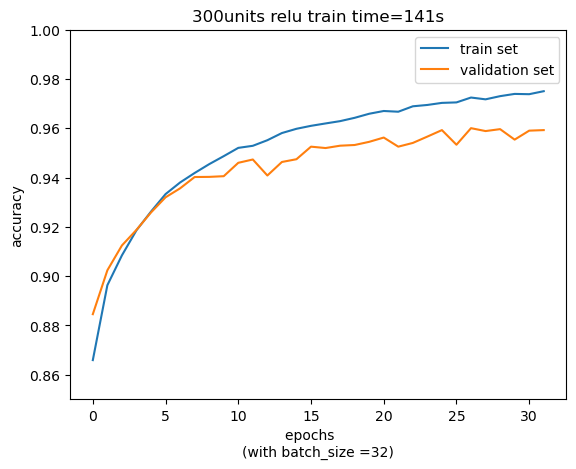

In [4]:
SaveFileName = 'ANN_300relu_2softmax_BinaryCrossEntropy.joblib'
batch_size = 32; 
n_neurones_liste = [300] 
ACTIVATION = 'relu'
LossFunction = 'BinaryCrossentropy'

%cd '/Users/juliencatanese/Dropbox/Datascientest/Projet_datascientest/Data_Kaggle/'
%pwd

import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical 

from time import time
from joblib import dump, load

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import classification_report

import itertools
import tensorflow as tf

# import tensorflow as tf

# Lecture des donnees PTB.csv
ptb_abnormal = pd.read_csv('./ptbdb_abnormal.csv', header=None)
ptb_normal = pd.read_csv('./ptbdb_normal.csv', header=None)

# Concatenation des deux DataFrames
ptb = pd.concat([ptb_normal, ptb_abnormal], ignore_index=True, sort=False)
ptb.rename(columns={187 :'class'}, inplace=True)

# Lecture des donnees MIT.csv
mit_train = pd.read_csv('./mitbih_train.csv', header=None)
mit_test = pd.read_csv('./mitbih_test.csv', header=None)

# Concatenation des deux DataFrames
mit = pd.concat([mit_train, mit_test], ignore_index=True, sort=False)
mit.rename(columns={187 :'class'}, inplace=True)

# Groupement des classes non-normal (1,2,3,4) en une seule classe Anormal (label=1)
mit['class'].replace({2:1,3:1,4:1}, inplace=True)

# Concatenation des jeux de donnees PTB et MIT  
data = pd.concat([ptb, mit], ignore_index=True, sort=False)

y = data['class'].copy()
X = data.drop('class', axis=1).copy()

X_train90, X_valid, y_train90, y_valid = train_test_split(X, 
                                                          y, 
                                                          train_size=0.9, 
                                                          random_state=1,
                                                          shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X_train90, 
                                                    y_train90, 
                                                    train_size=0.8, 
                                                    random_state=1,
                                                    shuffle=True)

print('X_train.shape=',X_train.shape)
print('X_test.shape=',X_test.shape)
print('X_valid.shape=',X_valid.shape)

print('y_train.shape=',y_train.shape)
y_train_cat = to_categorical(y_train, dtype='int')
print('y_train_cat.shape=',y_train_cat.shape)


inputs = tf.keras.Input(
    shape=X_train.shape[1],
    batch_size=None,
    name='inputs',
    dtype=None,
    sparse=None,
    tensor=None,
    ragged=None,
    type_spec=None)

# n_neurones_liste = [2, 10, 20, 50, 100, 200, 300, 500, 1000, 2000] 

for n_neurones in n_neurones_liste:

    dense_layer1 = tf.keras.layers.Dense(
        units = n_neurones,
        name='dense_layer1_' + ACTIVATION,
        activation=ACTIVATION,
        use_bias=True,
        kernel_initializer="normal",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None)

    layer2 = False
    if layer2:
        dense_layer2 = tf.keras.layers.Dense(
            units = 10,
            name='dense_layer2_' + ACTIVATION,
            activation= ACTIVATION,
            use_bias=True,
            kernel_initializer="normal",
            bias_initializer="zeros",
            kernel_regularizer=None,
            bias_regularizer=None,
            activity_regularizer=None,
            kernel_constraint=None,
            bias_constraint=None)

        layer3 = True
        if layer3:
            dense_layer3 = tf.keras.layers.Dense(
                units = 20,
                name='dense_layer3_' + ACTIVATION,
                activation= ACTIVATION,
                use_bias=True,
                kernel_initializer="normal",
                bias_initializer="zeros",
                kernel_regularizer=None,
                bias_regularizer=None,
                activity_regularizer=None,
                kernel_constraint=None,
                bias_constraint=None)

    dense_output = tf.keras.layers.Dense(
        units = 2,
        name='dense_output_sigmoid',
        activation='softmax',
        use_bias=True,
        kernel_initializer="normal",
        bias_initializer="zeros")

    x=dense_layer1(inputs)
    if layer2==True: 
        x=dense_layer2(x)
        if layer3==True: 
            x=dense_layer3(x)
    outputs = dense_output(x)

    model = Model(inputs = inputs, outputs =outputs)
    model.summary()


    model.compile(loss= LossFunction, optimizer= 'adam', metrics=['accuracy'])

    epoch = 200 ; print('epoch=', epoch)

    t0 = time()
    train_history = model.fit(X_train, 
                              y_train_cat, 
                              batch_size=batch_size, 
                              epochs=epoch, 
                              validation_split =0.2, 
                              callbacks = tf.keras.callbacks.EarlyStopping(patience=5))
    t1 = time() - t0
    print("===== Réalisé en {} secondes ======".format(round(t1,3)))

    param_dense1 = {'units':dense_layer1.units,
        'name':dense_layer1.name,
        'activation':str(dense_layer1.activation).split(' ')[1],
        'use_bias':dense_layer1.use_bias,
        'kernel_initializer':dense_layer1.kernel_initializer,
        'bias_initializer':dense_layer1.bias_initializer}

    params = {'Layer1':param_dense1, 'batch_size':batch_size, 'train_time':round(t1,3)}

    param_L1_Name = str(params['Layer1']['activation']) + str(params['Layer1']['units'])+ 'u_' 

    paramName = 'L1_' + param_L1_Name; 

    if layer2:
        param_dense2 = {'units':dense_layer2.units,
            'name':dense_layer2.name,
            'activation':str(dense_layer2.activation).split(' ')[1],
            'use_bias':dense_layer2.use_bias,
            'kernel_initializer':dense_layer2.kernel_initializer,
            'bias_initializer':dense_layer2.bias_initializer}

        params = {'Layer1':param_dense1, 'Layer2':param_dense2, 'batch_size':batch_size, 'train_time':round(t1,3)}

        param_L2_Name = str(params['Layer2']['activation']) + str(params['Layer2']['units'])+ 'u_' 

        paramName = 'L2' + param_L2_Name +  'L1' + param_L1_Name

        if layer3:
            param_dense3 = {'units':dense_layer3.units,
            'name':dense_layer3.name,
            'activation':str(dense_layer3.activation).split(' ')[1],
            'use_bias':dense_layer3.use_bias,
            'kernel_initializer':dense_layer3.kernel_initializer,
            'bias_initializer':dense_layer3.bias_initializer}

            params = {'Layer1':param_dense1, 'Layer2':param_dense2, 'Layer3':param_dense3,
                      'batch_size':batch_size, 'train_time':round(t1,3)}

            param_L3_Name = str(params['Layer3']['activation']) + str(params['Layer3']['units'])+ 'u_'         

            paramName = 'L3'  +  param_L3_Name    + 'L2' + param_L2_Name +  'L1' + param_L1_Name

    dump([model, params, train_history],SaveFileName)
    print('batch_size=',batch_size)
    print('Model saved as ', SaveFileName)

    print(model.summary())
    y_pred_cat = model.predict(X_test)
    y_pred = y_pred_cat.argmax(axis=1)
    print(classification_report(y_test, y_pred))


    train_set =train_history.history['accuracy']
    val_set =train_history.history['val_accuracy']

    plt.figure(n_neurones)
    plt.plot(train_set,label = 'train set');
    plt.plot(val_set, label= 'validation set');
    plt.ylabel('accuracy')
    plt.xlabel('epochs    \n(with batch_size ='+  str(params['batch_size'])  +')')
    plt.legend();
    plt.ylim([0.85,1])
    L1U= params['Layer1']['units']
    L1A= params['Layer1']['activation']
    TT = params['train_time']
    plt.title(str(L1U)+'units '+L1A +' train time='+str(int(TT))+'s')


In [ ]:
import shap
# help(shap.DeepExplainer)
import warnings
warnings.filterwarnings('ignore')
X_train.shape
X_train.iloc[:187,:].shape
X_train[0:10]

In [ ]:
t0 = time()

explainer = shap.DeepExplainer(
    model, 
    data=X_train.to_numpy())

t1 = time() - t0
print("===== Réalisé en {} secondes ======".format(round(t1,3)))

In [ ]:
t0 = time()
shap_v = explainer.shap_values(X_test.to_numpy()[:100])

t1 = time() - t0
print("===== Réalisé en {} secondes ======".format(round(t1,3)))

In [ ]:
shap.summary_plot(shap_v, X_test, plot_type="bar")

In [ ]:
X_test.columns[1]

In [ ]:
 len(shap_v)

In [ ]:
 len(shap_v[0])

In [ ]:
 len(shap_v[1])